# HuBMAP + HPA - Hacking the Human Body
A Project by Justin Grisanti

## Section 1: Project Overview

When you think of “life hacks,” normally you’d imagine productivity techniques. But how about the kind that helps you understand your body at a molecular level? It may be possible! Researchers must first determine the function and relationships among the 37 trillion cells that make up the human body. A better understanding of our cellular composition could help people live healthier, longer lives.

A previous Kaggle competition aimed to annotate cell population neighborhoods that perform an organ’s main physiologic function, also called functional tissue units (FTUs). Manually annotating FTUs (e.g., glomeruli in kidney or alveoli in the lung) is a time-consuming process. In the average kidney, there are over 1 million glomeruli FTUs. While there are existing cell and FTU segmentation methods, we want to push the boundaries by building algorithms that generalize across different organs and are robust across different dataset differences.

The Human BioMolecular Atlas Program (HuBMAP) is working to create a Human Reference Atlas at the cellular level. Sponsored by the National Institutes of Health (NIH), HuBMAP and Indiana University’s Cyberinfrastructure for Network Science Center (CNS) have partnered with institutions across the globe for this endeavor. A major partner is the Human Protein Atlas (HPA), a Swedish research program aiming to map the protein expression in human cells, tissues, and organs, funded by the Knut and Alice Wallenberg Foundation.

In this competition, you’ll identify and segment functional tissue units (FTUs) across five human organs. You'll build your model using a dataset of tissue section images, with the best submissions segmenting FTUs as accurately as possible.

If successful, you'll help accelerate the world’s understanding of the relationships between cell and tissue organization. With a better idea of the relationship of cells, researchers will have more insight into the function of cells that impact human health. Further, the Human Reference Atlas constructed by HuBMAP will be freely available for use by researchers and pharmaceutical companies alike, potentially improving and prolonging human life.

The goal of this competition is to identify the locations of each functional tissue unit (FTU) in biopsy slides from several different organs. The underlying data includes imagery from different sources prepared with different protocols at a variety of resolutions, reflecting typical challenges for working with medical data.

## Section 2: Data Understanding

The next step is to understand the dataset and what it is we are trying to accomplish. This competition uses data from two different consortia, the Human Protein Atlas (HPA) and Human BioMolecular Atlas Program (HuBMAP). The training dataset consists of data from public HPA data, the public test set is a combination of private HPA data and HuBMAP data, and the private test set contains only HuBMAP data. Adapting models to function properly when presented with data that was prepared using a different protocol will be one of the core challenges of this competition. While this is expected to make the problem more difficult, developing models that generalize is a key goal of this endeavor.

### Files

#### [train/test].csv 

Metadata for the train/test set. Only the first few rows of the test set are available for download.

* id - The image ID.
* organ - The organ that the biopsy sample was taken from.
* data_source - Whether the image was provided by HuBMAP or HPA.
* img_height - The height of the image in pixels.
* img_width - The width of the image in pixels.
* pixel_size - The height/width of a single pixel from this image in micrometers. All HPA images have a pixel size of 0.4 µm. For HuBMAP imagery the pixel size is 0.5 µm for kidney, 0.2290 µm for large intestine, 0.7562 µm for lung, 0.4945 µm for spleen, and 6.263 µm for prostate.
* tissue_thickness - The thickness of the biopsy sample in micrometers. All HPA images have a thickness of 4 µm. The HuBMAP samples have tissue slice thicknesses 10 µm for kidney, 8 µm for large intestine, 4 µm for spleen, 5 µm for lung, and 5 µm for prostate.
* rle - The target column. A run length encoded copy of the annotations. Provided for the training set only.
* age - The patient's age in years. Provided for the training set only.
* sex - The sex of the patient. Provided for the training set only.

#### sample_submission.csv

id - The image ID.
rle - A run length encoded mask of the FTUs in the image.

#### [train/test]_images/ 

The images. Expect roughly 550 images in the hidden test set. All HPA images are 3000 x 3000 pixels with a tissue area within the image around 2500 x 2500 pixels. The HuBMAP images range in size from 4500x4500 down to 160x160 pixels. HPA samples were stained with antibodies visualized with 3,3'-diaminobenzidine (DAB) and counterstained with hematoxylin. HuBMAP images were prepared using Periodic acid-Schiff (PAS)/hematoxylin and eosin (H&E) stains. All images used have at least one FTU. All tissue data used in this competition is from healthy donors that pathologists identified as pathologically unremarkable tissue.

#### train_annotations/ 
The annotations provided in the format of points that define the boundaries of the polygon masks of the FTUs.

In [1]:
# Import necessary libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import keras
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [2]:
input_path = '/kaggle/input/hubmap-organ-segmentation/'
train_image_path = '/kaggle/input/hubmap-organ-segmentation/train_images/'

def image_data(num):
    '''integer between 0-350'''
    print(os.listdir(train_image_path)[num])
    img = plt.imread(train_image_path + os.listdir(train_image_path)[num])
    plt.imshow(img)
    plt.show()
    selection_df = pd.read_csv(input_path + 'train.csv')
    selection_df[selection_df['id']==int(os.listdir(train_image_path)[num].replace(".tiff",""))]
    return selection_df[selection_df['id']==int(os.listdir(train_image_path)[num].replace(".tiff",""))]

15329.tiff


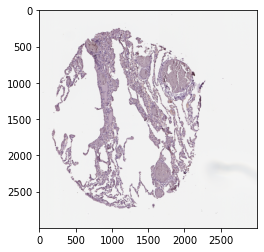

,id,organ,data_source,img_height,img_width,pixel_size,tissue_thickness,rle,age,sex
57,15329,lung,HPA,3000,3000,0.4,4,2585550 2 2588549 4 2591547 7 2594546 10 25975...,43.0,Female


In [3]:
image_data(0)